# 結果を確認する用

In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [13]:
# 自作ライブラリのimport

# ファイル読み込み
from modules.file_format.HDF5 import HDF5Reader
from modules.file_format.spe_wrapper import SpeWrapper
from modules.file_format.lightfield_csv_wrapper import LightfieldCsv
# データ処理
from modules.data_model.spectrum_data import SpectrumData


# Calibrate Spectrum

In [14]:
# 出力されたデータの読み込み
path_to_calib1 = '/Volumes/T7 Touch/T_calculation/calibrated/OIbDia04_  02_whole_m55e-2_calib.hdf'
path_to_calib2 = '/Volumes/T7 Touch/T_calculation/calibrated/OIbDia04_  02_separate_half_m55e-2_calib.hdf'

In [15]:
calib1_hdf = HDF5Reader(path_to_calib1)
calib2_hdf = HDF5Reader(path_to_calib2)

# それぞれfetcherを作る
calib1_fetcher = calib1_hdf.create_fetcher(query='calibrated')
calib2_fetcher = calib2_hdf.create_fetcher(query='calibrated')

HDF5ファイルが見つかりました: /Volumes/T7 Touch/T_calculation/calibrated/OIbDia04_  02_whole_m55e-2_calib.hdf
HDF5ファイルが見つかりました: /Volumes/T7 Touch/T_calculation/calibrated/OIbDia04_  02_separate_half_m55e-2_calib.hdf
「calibrated」で検索します。
	-> entry/calibrated_spectra を返しました。
「calibrated」で検索します。
	-> entry/calibrated_spectra を返しました。


In [24]:
wl_arr = calib1_hdf.find_by(query='wavelength')
wl_arr.shape, wl_arr

「wavelength」で検索します。
	-> entry/wavelength_arr を返しました。


((512,),
 array([437.45559831, 438.48737887, 439.51914288, 440.55089035,
        441.58262126, 442.6143356 , 443.64603336, 444.67771454,
        445.70937913, 446.74102711, 447.77265847, 448.80427322,
        449.83587134, 450.86745282, 451.89901765, 452.93056583,
        453.96209734, 454.99361217, 456.02511033, 457.05659179,
        458.08805656, 459.11950461, 460.15093595, 461.18235056,
        462.21374844, 463.24512957, 464.27649395, 465.30784157,
        466.33917242, 467.37048649, 468.40178377, 469.43306426,
        470.46432794, 471.4955748 , 472.52680484, 473.55801806,
        474.58921443, 475.62039395, 476.65155661, 477.68270241,
        478.71383133, 479.74494336, 480.77603851, 481.80711675,
        482.83817808, 483.86922249, 484.90024998, 485.93126052,
        486.96225412, 487.99323077, 489.02419045, 490.05513316,
        491.08605889, 492.11696763, 493.14785937, 494.17873411,
        495.20959182, 496.24043252, 497.27125618, 498.30206279,
        499.33285236, 500.36362

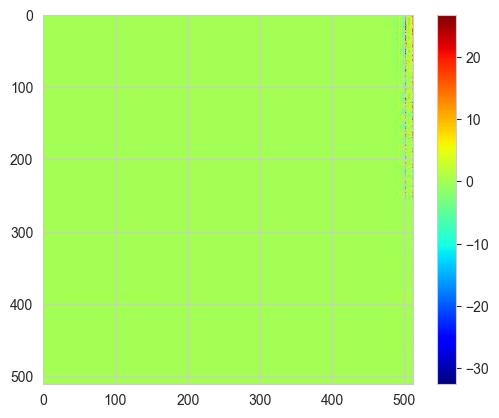

In [18]:
tmp_image_1 = calib1_fetcher.fetch_by_frame(frame=100)
plt.imshow(tmp_image_1, cmap='jet')
plt.colorbar()
plt.show()
plt.close()

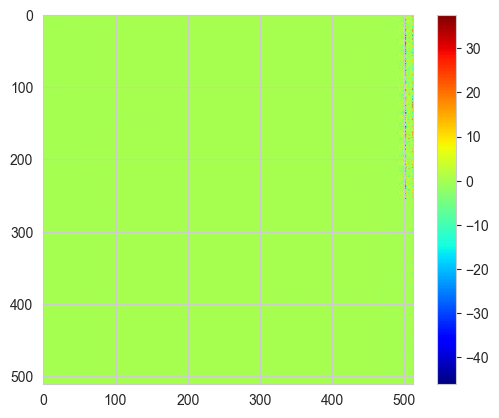

In [19]:
tmp_image_2 = calib2_fetcher.fetch_by_frame(frame=100)
plt.imshow(tmp_image_1 - tmp_image_2, cmap='jet')
plt.colorbar()
plt.show()
plt.close()

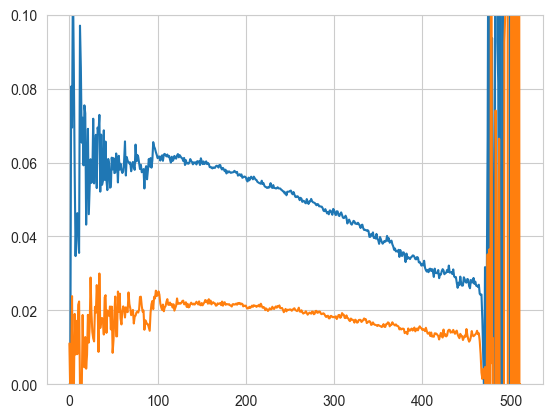

In [22]:
plt.plot(tmp_image_1[138, :])
plt.plot(tmp_image_1[383, :])
plt.ylim(0, 0.1)
plt.show()
plt.close()


# Fit by Planck